In [4]:
import pickle
import pandas as pd

In [7]:
with open(r"../data/metadata_dump_multiprocessing_extended.pkl", "rb") as f:
    data = pickle.load(f)

for k in data:
    print(k)

floor_reached
master_deck
relics
damage_taken_by_enemy
potions_obtained
floors_visited
items_purchased
neow_bonus
build_version
purchased_purges
events
neow_cost
is_trial
character_chosen
is_prod
is_daily
chose_seed
circlet_count
win_rate
is_beta
is_endless
special_seed
_total_processed_logs
_total_modded_logs_skipped
_total_errors_in_files
_files_processed_successfully
_files_failed_processing


In [6]:
floor_reached = data['floor_reached']
distances = [(k, v) for k, v in floor_reached.items()]
df = pd.DataFrame(distances, columns=["floor", "count"])
print(min(df.floor))
print(max(df.floor))

0
850


In [154]:
master_deck = data['master_deck']
print(type(master_deck))
print(len(master_deck))

<class 'collections.Counter'>
784


In [155]:
card_counts = [(k, v) for k, v in master_deck.items()]
cc_df = pd.DataFrame(card_counts, columns=["card", "count"])
cc_df = cc_df.sort_values('card').reset_index(drop=True)
VALID_CARDS = set(cc_df.loc[(cc_df['count'] >= 1000) | cc_df['card'].str.startswith("Searing"), 'card'])
VALID_CARDS

{'A Thousand Cuts',
 'A Thousand Cuts+1',
 'Accuracy',
 'Accuracy+1',
 'Acrobatics',
 'Acrobatics+1',
 'Adaptation',
 'Adaptation+1',
 'Adrenaline',
 'Adrenaline+1',
 'After Image',
 'After Image+1',
 'Aggregate',
 'Aggregate+1',
 'All For One',
 'All For One+1',
 'All Out Attack',
 'All Out Attack+1',
 'Alpha',
 'Alpha+1',
 'Amplify',
 'Amplify+1',
 'Anger',
 'Anger+1',
 'Apotheosis',
 'Apotheosis+1',
 'Armaments',
 'Armaments+1',
 'AscendersBane',
 'Auto Shields',
 'Auto Shields+1',
 'Backflip',
 'Backflip+1',
 'Backstab',
 'Backstab+1',
 'Ball Lightning',
 'Ball Lightning+1',
 'Bandage Up',
 'Bandage Up+1',
 'Bane',
 'Bane+1',
 'Barrage',
 'Barrage+1',
 'Barricade',
 'Barricade+1',
 'Bash',
 'Bash+1',
 'Battle Trance',
 'Battle Trance+1',
 'BattleHymn',
 'BattleHymn+1',
 'Beam Cell',
 'Beam Cell+1',
 'Berserk',
 'Berserk+1',
 'Biased Cognition',
 'Biased Cognition+1',
 'Bite',
 'Bite+1',
 'Blade Dance',
 'Blade Dance+1',
 'Blasphemy',
 'Blasphemy+1',
 'Blind',
 'Blind+1',
 'Blizzard

In [120]:
searing_blows = [(k, v) for k, v in master_deck.items() if k[:7] == "Searing"]
searing_blows = sorted(searing_blows)
sb = [(0, searing_blows[0][1]),]
for k, v in searing_blows[1:]:
    level = int(k.split("+")[1])
    count = v
    sb.append((level, count))
sb_df = pd.DataFrame(sb, columns=["level", "count"])
sb_df

,level,count
0,0,645719
1,1,453193
2,10,15135
3,11,12701
4,12,8458
...,...,...
90,92,1
91,93,2
92,94,1
93,95,2


<Axes: xlabel='level'>

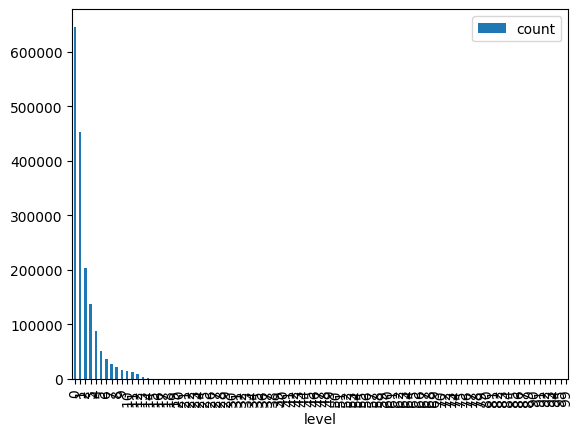

In [121]:
sb_df.sort_values("level").plot(x="level", y="count", kind="bar")

In [156]:
upgraded = [(k, v) for k, v in master_deck.items() if ("+" in k) and (k[:7] != "Searing")]
upgraded

[('Defend_R+1', 11290972),
 ('Anger+1', 2114108),
 ('Inflame+1', 3519682),
 ('Cleave+1', 2456765),
 ('Spot Weakness+1', 2247865),
 ('Pommel Strike+1', 2907680),
 ('Wild Strike+1', 826461),
 ('Whirlwind+1', 2385764),
 ('Glacier+1', 1233869),
 ('Force Field+1', 460601),
 ('Doom and Gloom+1', 771564),
 ('Storm+1', 1509358),
 ('Apotheosis+1', 1438095),
 ('Ball Lightning+1', 2471483),
 ('Defragment+1', 4727835),
 ('Compile Driver+1', 732160),
 ('Redo+1', 2777745),
 ('Sweeping Beam+1', 1335420),
 ('Blizzard+1', 716970),
 ('Strike_R+1', 10747940),
 ('Armaments+1', 5918535),
 ('Clash+1', 1671058),
 ('True Grit+1', 2546396),
 ('Flame Barrier+1', 2005919),
 ('Bash+1', 6783462),
 ('Ghostly Armor+1', 1052563),
 ('Warcry+1', 1494838),
 ('Body Slam+1', 3252611),
 ('Rage+1', 1550141),
 ('Headbutt+1', 1523518),
 ('Entrench+1', 1244521),
 ('Intimidate+1', 760861),
 ('Rampage+1', 1796955),
 ('Seeing Red+1', 1894016),
 ('Thunderclap+1', 1796647),
 ('Bloodletting+1', 613527),
 ('Strike_G+1', 7635005),
 ('

In [157]:
base = [(k, v) for k, v in master_deck.items() if ("+" not in k) and (k[:7] != "Searing")]
len(base)

351

In [158]:
upgraded_set = set(vals[0].split("+")[0] for vals in upgraded)
base_set = set(vals[0] for vals in base)


In [159]:
base_set.difference(upgraded_set)

{'AscendersBane',
 'Clumsy',
 'CurseOfTheBell',
 'Decay',
 'Doubt',
 'Injury',
 'Necronomicurse',
 'Normality',
 'Pain',
 'Parasite',
 'Regret',
 'Shame',
 'Writhe'}

In [127]:
neow_bonus = data['neow_bonus']
print(type(neow_bonus))
print(len(neow_bonus))
# for k, v in neow_bonus.items():
#     print(item)

neow_bonus

<class 'collections.Counter'>
19


Counter({'THREE_ENEMY_KILL': 19487342,
         'BOSS_RELIC': 6346681,
         'TEN_PERCENT_HP_BONUS': 5842586,
         'RANDOM_COMMON_RELIC': 5824489,
         'ONE_RARE_RELIC': 4165478,
         'ONE_RANDOM_RARE_CARD': 3289516,
         'HUNDRED_GOLD': 2962915,
         'THREE_RARE_CARDS': 2706593,
         'THREE_CARDS': 2170334,
         'TWO_FIFTY_GOLD': 1998901,
         'UPGRADE_CARD': 1976778,
         'RANDOM_COLORLESS': 1906939,
         'TRANSFORM_TWO_CARDS': 1486581,
         'TRANSFORM_CARD': 1482544,
         'RANDOM_COLORLESS_2': 1402359,
         'REMOVE_CARD': 1174381,
         'REMOVE_TWO': 1170604,
         'TWENTY_PERCENT_HP_BONUS': 972335,
         'THREE_SMALL_POTIONS': 891216})

In [108]:
build_version = data['build_version']
print(type(build_version))
print(len(build_version))

<class 'set'>
172


In [17]:
build_version

{'2018-06-14',
 '2018-06-14v2',
 '2018-06-18',
 '2018-06-19v2',
 '2018-06-20v3',
 '2018-06-21',
 '2018-06-21v2',
 '2018-06-26',
 '2018-06-27',
 '2018-06-28',
 '2018-06-29',
 '2018-07-02',
 '2018-07-05',
 '2018-07-11',
 '2018-07-12',
 '2018-07-13',
 '2018-07-16',
 '2018-07-17',
 '2018-07-19',
 '2018-07-19v2',
 '2018-07-23',
 '2018-07-24',
 '2018-07-26',
 '2018-07-30',
 '2018-07-31',
 '2018-08-01',
 '2018-08-02',
 '2018-08-07',
 '2018-08-08',
 '2018-08-09',
 '2018-08-13v2',
 '2018-08-16',
 '2018-08-20',
 '2018-08-21',
 '2018-08-23v2',
 '2018-08-27',
 '2018-08-29',
 '2018-08-30',
 '2018-09-04',
 '2018-09-04-v2',
 '2018-09-06',
 '2018-09-10',
 '2018-09-12',
 '2018-09-17',
 '2018-09-18',
 '2018-09-18v2',
 '2018-09-18v3',
 '2018-09-19',
 '2018-09-20',
 '2018-09-24',
 '2018-09-25',
 '2018-09-26v2',
 '2018-09-27',
 '2018-10-02',
 '2018-10-03',
 '2018-10-04',
 '2018-10-04v2',
 '2018-10-08',
 '2018-10-09',
 '2018-10-10',
 '2018-10-11',
 '2018-10-15',
 '2018-10-15v2',
 '2018-10-16',
 '2018-10-17'

In [109]:
purchased_purges = data['purchased_purges']
print(type(purchased_purges))
print(len(purchased_purges))

<class 'collections.Counter'>
85


In [110]:
purges = [(k, v) for k, v in data['purchased_purges'].items()]
purges_df = pd.DataFrame(purges, columns=['purges', 'count'])

In [111]:
purges_df

,purges,count
0,0,36010177
1,2,8151094
2,1,18391844
3,3,3212237
4,4,1066019
...,...,...
80,88,1
81,46,1
82,32,5
83,98,1


In [112]:
events = data['events']
print(type(events))
print(len(events))

<class 'collections.Counter'>
72


In [115]:
# for k, v in events.items():
#     print(k, v, sep="\t")
#
EVENTS = {k for k, v in events.items() if v > 100}
EVENTS

{'Accursed Blacksmith',
 'Addict',
 'Back to Basics',
 'Beggar',
 'Big Fish',
 'Bonfire Elementals',
 'Colosseum',
 'Cursed Tome',
 'Dead Adventurer',
 'Designer',
 'Drug Dealer',
 'Duplicator',
 'FaceTrader',
 'Falling',
 'Forgotten Altar',
 'Fountain of Cleansing',
 'Ghosts',
 'Golden Idol',
 'Golden Shrine',
 'Golden Wing',
 'Knowing Skull',
 'Lab',
 'Liars Game',
 'Living Wall',
 'Masked Bandits',
 'Match and Keep!',
 'MindBloom',
 'Mushrooms',
 'Mysterious Sphere',
 "N'loth",
 'Nest',
 'NoteForYourself',
 'Purifier',
 'Scrap Ooze',
 'SecretPortal',
 'SensoryStone',
 'Shining Light',
 'The Cleric',
 'The Joust',
 'The Lab',
 'The Library',
 'The Mausoleum',
 'The Moai Head',
 'The Woman in Blue',
 'Tomb of Lord Red Mask',
 'Transmorgrifier',
 'Upgrade Shrine',
 'Vampires',
 'WeMeetAgain',
 'Wheel of Change',
 'Winding Halls',
 'World of Goop'}

In [ ]:
"""
neow_cost
is_trial
character_chosen
is_prod
is_daily
chose_seed
circlet_count
win_rate
is_beta
is_endless
special_seed
"""

In [8]:
neow_cost = data['neow_cost']
print(neow_cost)

# Dump '', 'FIFTY_PERCENT_DAMAGE', 'BASIC_CARDS'

Counter({'NONE': 53355622, 'PERCENT_DAMAGE': 3740557, 'NO_GOLD': 3727269, 'TEN_PERCENT_HP_LOSS': 3324654, 'CURSE': 3107366, '': 1316354, 'FIFTY_PERCENT_DAMAGE': 2934, 'BASIC_CARDS': 54})


In [9]:
is_trial = data['is_trial']
is_trial

Counter({False: 68593271})

In [10]:
character_chosen = data['character_chosen']
character_chosen

# Dump character_chosen == 'SCHOLAR'

Counter({'IRONCLAD': 26169002,
         'THE_SILENT': 20683468,
         'DEFECT': 19786108,
         'WATCHER': 1954692,
         'SCHOLAR': 1})

In [11]:
is_prod = data['is_prod']
is_prod

Counter({False: 68593271})

In [12]:

is_daily = data['is_daily']
is_daily

Counter({False: 68593271})

In [13]:
chose_seed = data['chose_seed']
chose_seed

Counter({False: 68591484, True: 1787})

In [15]:
circlet_count = data['circlet_count']
# circlet_count

# remove circle_count > 0

In [18]:
win_rate = data['win_rate']
# Keep all win_rates because I have no idea what this metric is

In [20]:
is_beta = data['is_beta']
for k, v in is_beta.items():
    print(k, f"{v:_}")

False 62_160_293
True 6_358_713


In [21]:
is_endless = data['is_endless']
is_endless

Counter({False: 68593271})

In [22]:
special_seed = data['special_seed']
special_seed

Counter({0: 16436554,
         17873: 40,
         17833: 36,
         17854: 34,
         17832: 32,
         17848: 32,
         17875: 32,
         17831: 31,
         17867: 30,
         17845: 29,
         17880: 29,
         17839: 27,
         17897: 27,
         17902: 27,
         17834: 26,
         17857: 26,
         17729: 25,
         17858: 25,
         17904: 25,
         17849: 24,
         17863: 24,
         17866: 24,
         17876: 24,
         17892: 24,
         17712: 23,
         17837: 23,
         17887: 23,
         17830: 22,
         17727: 22,
         17853: 22,
         17860: 22,
         17872: 22,
         17894: 22,
         17936: 22,
         17720: 21,
         17836: 21,
         17882: 21,
         17728: 20,
         17838: 20,
         17725: 20,
         17855: 20,
         17861: 20,
         17868: 20,
         17896: 20,
         17900: 20,
         17719: 19,
         17835: 19,
         17847: 19,
         17859: 19,
         17895: 19